# Pipeline

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma classe do sklearn que permite aplicar uma sequência de transformações em um estimador final. <br>
Para isso, os passos intermediários devem ter implementados métodos de `fit` e `transform` enquanto o estimador final só precisa ter o `fit` implementado. <br>
O propósito do `pipeline` é:
- reunir várias etapas para serem validadas de forma cruzada (cross-validation) ao definir parâmetros diferentes
- ajudar a criar códigos que possuam um padrão que possa ser facilmente entendido e compartilhando entre times de cientista e engenheiro de dados.
- facilitar a implementação

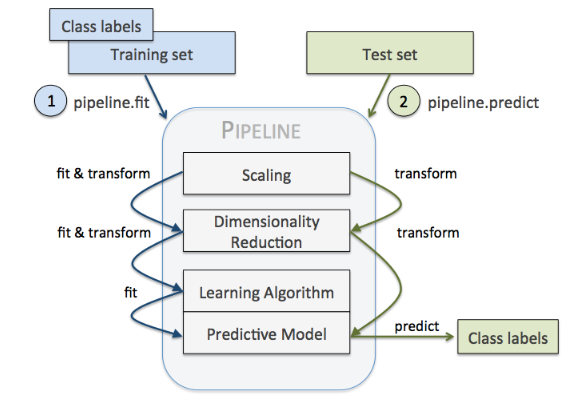


**SEM PIPELINE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando um dataset modificado

df = pd.read_csv('../datasets/iris_with_nulls.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# oberve que existem dados faltantes em todas as features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   144 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# confirmando
df.isna().sum()

sepal_length    4
sepal_width     4
petal_length    1
petal_width     6
species         0
dtype: int64

O algoritmo de machine learning vai rodar com as features e o target.

In [6]:
X = df.drop(columns=['species']) # features
y = df['species'] # target

In [8]:
# dados categóricos e tenho que transformar em numéricos
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [10]:
# Agora vamos transformar os labels em números 0, 1 e 2
# (dá para fazer na mão mas vamos usar o sklearn) -> Label Encoder que vai mudar a categoria para um número
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() #instaciei a classe
y_enc = label_encoder.fit_transform(y)

In [13]:
print(y[-10:])
print(y_enc[-10:])

140    Iris-virginica
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, dtype: object
[2 2 2 2 2 2 2 2 2 2]


In [21]:
# aplicar a média nos dados faltantes
X['sepal_length'] = X['sepal_length'].fillna(X['sepal_length'].mean())
X['sepal_width'] = X['sepal_width'].fillna(X['sepal_width'].mean())
X['petal_length'] = X['petal_length'].fillna(X['petal_length'].mean())
X['petal_width'] = X['petal_width'].fillna(X['petal_width'].mean())

In [22]:
X.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [24]:
# aplicar a padronização/normalização pois vamos usar o KNN (e ele usa o método de distâncias)
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_sc = std.fit_transform(X) # ele calcula(fit) e transforma


In [25]:
X_sc

array([[-9.32666954e-01,  1.02468196e+00, -1.35638703e+00,
        -1.37419326e+00],
       [-1.17868209e+00, -1.47759781e-01, -1.35638703e+00,
        -1.37419326e+00],
       [-1.42469722e+00,  3.21216914e-01, -1.41354247e+00,
        -1.37419326e+00],
       [-1.54770478e+00,  8.67285668e-02, -1.29923158e+00,
        -1.37419326e+00],
       [-1.05567452e+00,  1.25917030e+00, -1.35638703e+00,
        -1.37419326e+00],
       [-5.63644257e-01,  1.96263535e+00, -1.18492068e+00,
        -1.10551189e+00],
       [ 0.00000000e+00,  7.90193609e-01, -1.35638703e+00,
        -1.23985257e+00],
       [-1.05567452e+00,  7.90193609e-01, -1.29923158e+00,
        -1.37419326e+00],
       [-1.79371991e+00, -3.82248128e-01, -1.35638703e+00,
        -1.37419326e+00],
       [-1.17868209e+00,  8.67285668e-02, -1.29923158e+00,
        -1.50853394e+00],
       [-5.63644257e-01,  1.49365865e+00, -1.29923158e+00,
        -1.37419326e+00],
       [-1.30168965e+00,  7.90193609e-01, -1.24207613e+00,
      

In [28]:
# Começa o modelo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y_enc, test_size=0.3, stratify=y_enc, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Avaliar o modelo
from sklearn.metrics import classification_report

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(classification_report(y_pred_train, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.79      0.88        19
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



In [62]:
# treinando com o Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
# Avaliar o modelo
from sklearn.metrics import classification_report

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print(classification_report(y_pred_train, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.74      0.82        19
           2       0.73      0.92      0.81        12

    accuracy                           0.87        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.88      0.87      0.87        45



In [39]:
# estou criando dados novos inéditos para descobrir a specie (y)
df1 = df.drop(columns='species').sample(10)
df1.reset_index(drop=True, inplace=True)

In [40]:
# Quero fazer a predição dos dados abaixo com o modelo treinado
df1

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.4,3.8,1.1
1,4.8,3.4,1.6,0.2
2,4.5,2.3,1.3,0.3
3,4.4,2.9,1.4,0.2
4,7.2,3.6,6.1,2.5
5,5.4,3.9,1.7,0.4
6,5.9,3.0,5.1,1.8
7,6.3,2.5,4.9,1.5
8,6.9,3.2,5.7,2.3
9,4.9,2.5,4.5,1.7


In [64]:
# Primeiramente temos que preencher os dados faltantes

df1['sepal_length'] = df1['sepal_length'].fillna(df['sepal_length'].mean()) # estamos preenchendo com a média do dataframe original
df1['sepal_width'] = df1['sepal_width'].fillna(df['sepal_width'].mean())
df1['petal_length'] = df1['petal_length'].fillna(df['petal_length'].mean())
df1['petal_width'] = df1['petal_width'].fillna(df['petal_width'].mean())

# Agora vamos fazer a normalização/padronização

df1_sc = std.transform(df1)

predicoes = knn.predict(df1_sc)

predicoes2 = rf.predict(df1_sc)

In [65]:
# Recuperando os labels da predição
label_encoder.inverse_transform(predicoes)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [66]:
label_encoder.inverse_transform(predicoes2)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

**Com pipeline**

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipe_knn = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('model', KNeighborsClassifier())])

In [74]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [78]:
y_pred_test = pipe_knn.predict(X_test)
y_pred_train = pipe_knn.predict(X_train)

In [79]:
print(classification_report(y_pred_train, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.79      0.88        19
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



In [81]:
pipe_rf = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('model', RandomForestClassifier())])

pipe_rf.fit(X_train, y_train)

y_pred_test = pipe_rf.predict(X_test)
y_pred_train = pipe_rf.predict(X_train)

print(classification_report(y_pred_train, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.78      0.85        18
           2       0.80      0.92      0.86        13

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.89      0.89      0.89        45

